In [96]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

In [97]:
df = pd.read_excel("D:/github/Etape/toutReponse.xlsx")

In [98]:
df = df.drop("id", axis =1)

In [99]:
df.head()

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
0,Bilan de competences,Avranches,2021-02-03,2021-06-04,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Peu satisfaisant,Très satisfaisant,NaN,Apprécié les moyens mit à dispositions même si...,Test plus précis a fin de cibler davantage 2 v...,2021-06-22 12:05:16
1,Bilan de competences,Vire,2021-02-23,2021-06-08,prescripteur,prescripteur,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J'ai été ravie de la prise en charge de mon bi...,NaN,2021-06-22 12:18:15
2,Bilan de competences,Vire,2021-02-23,2021-06-08,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,NaN,NaN,2021-06-22 12:20:08
3,Bilan de competences,Vire,2021-02-23,2021-06-08,intervenant-e,intervenant-e,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 12:21:35
4,Bilan de competences,Vire,2021-01-08,0021-05-03,prescripteur,prescripteur,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aucun,NaN,2021-06-22 12:23:50


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   dispositif     176 non-null    object
 1   site           169 non-null    object
 2   debut          176 non-null    object
 3   fin            177 non-null    object
 4   statue         179 non-null    object
 5   branche        179 non-null    object
 6   fin1           7 non-null      object
 7   fin2           7 non-null      object
 8   fin3           7 non-null      object
 9   fin4           8 non-null      object
 10  fin5           8 non-null      object
 11  intType        44 non-null     object
 12  inter1         45 non-null     object
 13  inter2         43 non-null     object
 14  inter3         44 non-null     object
 15  inter4         42 non-null     object
 16  intForDis      44 non-null     object
 17  inter5         14 non-null     object
 18  intRisqS       44 non-null    

### Raccourcissement du nom de disposition.

In [101]:
map_dict = {"Remobilisation" : "Remob", "Garantie Departementale d'Activite (GAD)" : "GDA", 
            "Primo insertion sociale":"PIS", "Primo insertion professionnelle":"PIP", 
            "Actions courtes type 'marchons pour ... '":"AC", "Formation civique OFII":"FCO", 
            "Jardins partages": "JP", "#avenir":"#avenir", "Accompagnement a la preparation de la VAE":"APV", 
            "Bilan de competences":"BC","Reseau de soutien et de recherche d'emploi":"RSRE", 
            "Prestations specifiques":"PS", "Accompagnement des porteurs de projets":"APP", 
            "Formation des acteurs":"FA", "Interventions dans les centres de formation":"ICF", 
            "Interventions scolaires et universitaires":"ISU", "La dynimique de l'emploi":"DE", 
            "Présentation du Harcelement":"PH"}
df.dispositif = df.dispositif.map(map_dict)

## Gérer les valeurs manquantes et mauvais

In [102]:
df.isnull().sum()[0:6]
# pd.isnull(df).sum()
# df.dropna(inplace=True)
# sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")
#df.isnull().sum().sum()

dispositif     3
site          10
debut          3
fin            2
statue         0
branche        0
dtype: int64

### Dispositif

In [103]:
df[df.dispositif.isnull()==True]

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
7,NaN,Vire,2021-02-11,2021-05-03,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Satisfaisant,Très satisfaisant,NaN,NaN,+ modernisation des test d'aptitudes +++,2021-06-22 12:30:05
18,NaN,Vire,2021-01-11,2021-04-23,intervenant-e,intervenant-e,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 12:46:10
30,NaN,NaN,2020-12-02,2021-03-24,intervenant-e,intervenant-e,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 13:01:54


In [104]:
df.at[7, "dispositif"] = "BC" #df[(df.debut == "2021-02-11") | (df.fin == "2021-05-03")], il ya 4 et tous sont BC.
df.at[18, "dispositif"] ="BC" #df[(df.debut == "2021-01-11") | (df.fin == "2021-04-23")], il ya 4 et tous sont BC.
df.at[30, "dispositif"] ="BC" #df[(df.debut == "2020-12-02") | (df.fin == "2021-03-24")], İL ya 3 et 2 autre sont BC

In [105]:
df.dispositif.isnull().sum()

0

### Site

In [106]:
df[df.site.isnull()==True].head()

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
25,BC,NaN,2021-03-04,2021-06-11,prescripteur,prescripteur,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 12:56:46
26,BC,NaN,2021-03-04,2021-06-11,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,NaN,NaN,2021-06-22 12:57:32
30,BC,NaN,2020-12-02,2021-03-24,intervenant-e,intervenant-e,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 13:01:54
51,BC,NaN,2020-09-01,2020-11-28,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Satisfaisant,Très satisfaisant,Très satisfaisant,Satisfaisant,NaN,"Peut-être un peu plus de temps, plus de rendez...",2021-06-22 14:27:42
107,ISU,NaN,2020-12-01,2020-12-01,prescripteur,prescripteur,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bonne intention intervenants/ élèves. Théme in...,fait un contexte particulier,2021-06-30 10:31:12


In [107]:
df.at[30, "site"] ="Saint-Lo" # df[(df.debut == "2020-12-02") | (df.fin == "2021-03-24")], İL ya 3 et 2 autre sont st.lo
df.at[25, "site"] ="Vire" #df[(df.debut == "2021-03-04") | (df.fin == "2021-06-11")]
df.at[26, "site"] ="Vire" #df[(df.debut == "2021-03-04") | (df.fin == "2021-06-11")]
df.at[51, "site"] ="Vire"  #df[(df.debut == "2020-09-01") | (df.fin == "2020-11-28")] meme dates avec ça
df.at[107, "site"] = "Autre Lieu Delocalise" # meme dates il ya 2 differant dispositif, je designe comme ca. 
df.at[108, "site"] = "Autre Lieu Delocalise" # meme dates il ya 2 differant dispositif, je designe comme ca. 
df.at[111, "site"] = "Autre Lieu Delocalise" #df[(df.debut == "2021-04-06") | (df.fin == "2021-06-25")], il ya 8 data meme
df.at[119, "site"] = "La Ferte-Mace" #df[df.dispositif =="Actions courtes type 'marchons pour ... '"] il ya 2 dispositif action courtes je donne autre lieu
df.at[125, "site"] = "Bayeux"  #df[(df.debut == "2021-05-17") | (df.fin == "2021-07-16")] il ya 8 data meme dates avec bayeux
df.at[158, "site"] = "Avranches" #df[(df.debut == "2021-02-16") | (df.fin == "2021-09-02")]  il ya 12 data meme dates avec avranches

In [108]:
df.site.isnull().sum()

0

### Debut

In [109]:
df.debut.value_counts(ascending=False, sort=True).head() # il ya une mal valeur 212020-01-08. 

2020-06-01    14
2021-02-16    12
2020-06-08    12
2021-06-14    10
2020-11-30     9
Name: debut, dtype: int64

In [110]:
df.debut.replace(to_replace = "212020-01-08", value = "2021-01-08", inplace=True) 
df.debut.replace(to_replace = "2021-10-20", value = "2021-01-20", inplace=True)

In [111]:
df[df.debut.isnull()==True]

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
48,BC,Vire,NaN,NaN,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Satisfaisant,Satisfaisant,Satisfaisant,Satisfaisant,Satisfaisant,NaN,NaN,2021-06-22 14:12:17
54,BC,Saint-Lo,NaN,NaN,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,NaN,NaN,NaN,2021-06-23 09:16:58
104,PIP,Argentan,NaN,2021-06-15,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Satisfaisant,Satisfaisant,Satisfaisant,Satisfaisant,Satisfaisant,Satisfaisant,NaN,NaN,NaN,2021-06-25 09:05:06


In [112]:
df.at[48, "debut"] = "2020-01-09" 
df.at[104, "debut"] = "2021-01-20"
df.at[54, "debut"] = "2020-09-17"

In [113]:
df.debut.isnull().sum()

0

### Fin

In [114]:
df.fin.value_counts(dropna=False).head()

2020-11-02    13
2020-11-17    12
2021-09-02    12
2021-06-15     9
2021-07-16     8
Name: fin, dtype: int64

In [115]:
df.fin.replace(to_replace = "0021-05-03", value = "2021-05-03", inplace=True)

In [116]:
df.at[48, "fin"] = "2020-06-15"
df.at[54, "fin"] = "2021-02-01"
df.at[93, "fin"] = "2021-05-10" # debut est 2020-11-30, cest pas possible fin au 2020-05-10
df.at[97, "fin"] = "2021-03-01" # debut est 2020-08-01, cest pas possible fin au 2020-03-01

In [117]:
df[93:94]

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
93,PIS,La Ferte-Mace,2020-11-30,2021-05-10,intervenant-e,intervenant-e,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thème de prestation a été réalisée à la demand...,NaN,2021-06-23 13:10:30


In [118]:
df.fin.isnull().sum()

0

## Création de nouvelles colonnes

### Combien de jours l'action s'est-elle poursuivie ?

In [119]:
df.debut = pd.to_datetime(df.debut, format = "%Y-%m-%d")
df.fin = pd.to_datetime(df.fin, format = "%Y-%m-%d")

In [120]:
df["jour"] = df.fin-df.debut

In [121]:
df["jourChiffres"]=pd.to_timedelta(df.jour, errors="coerce").dt.days

In [122]:
df.loc[1, "jour"]

Timedelta('105 days 00:00:00')

In [123]:
df.loc[1, "jourChiffres"]

105

### En quelle année, mois et jour l'action s'est-elle faite?

In [124]:
df["annéeDebut"] = df["debut"].dt.year
df["moisDebut"] = df["debut"].dt.month
df["jourDebut"] = df["debut"].dt.day
df["annéeFin"] = df["fin"].dt.year
df["moisFin"] = df["fin"].dt.month
df["jourFin"] = df["fin"].dt.day

In [125]:
df[1:2]

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,...,proposition,register_date,jour,jourChiffres,annéeDebut,moisDebut,jourDebut,annéeFin,moisFin,jourFin
1,BC,Vire,2021-02-23,2021-06-08,prescripteur,prescripteur,NaN,NaN,NaN,NaN,...,NaN,2021-06-22 12:18:15,105 days,105,2021,2,23,2021,6,8


### Création d'une nouvelle colonne appelée "période".

In [126]:
df["périodeDebut"] = df["moisDebut"] >= 7
df["périodeDebut"] = df["périodeDebut"] + 1
df["périodeFin"] = df["moisFin"] >= 7
df["périodeFin"] = df["périodeFin"] + 1

In [127]:
df[1:2]

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,...,jour,jourChiffres,annéeDebut,moisDebut,jourDebut,annéeFin,moisFin,jourFin,périodeDebut,périodeFin
1,BC,Vire,2021-02-23,2021-06-08,prescripteur,prescripteur,NaN,NaN,NaN,NaN,...,105 days,105,2021,2,23,2021,6,8,1,1


### Création d'une nouvelle colonne appelée période annuelle.

In [128]:
df["périodeAnnuelleDebut"] = df["annéeDebut"].astype(str) + "-" + df["périodeDebut"].astype(str)

In [129]:
df["périodeAnnuelleFin"] = df["annéeFin"].astype(str) + "-" + df["périodeFin"].astype(str)

In [130]:
df[1:2]

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,...,annéeDebut,moisDebut,jourDebut,annéeFin,moisFin,jourFin,périodeDebut,périodeFin,périodeAnnuelleDebut,périodeAnnuelleFin
1,BC,Vire,2021-02-23,2021-06-08,prescripteur,prescripteur,NaN,NaN,NaN,NaN,...,2021,2,23,2021,6,8,1,1,2021-1,2021-1


## Nouvelle table 

In [131]:
df.columns

Index(['dispositif', 'site', 'debut', 'fin', 'statue', 'branche', 'fin1',
       'fin2', 'fin3', 'fin4', 'fin5', 'intType', 'inter1', 'inter2', 'inter3',
       'inter4', 'intForDis', 'inter5', 'intRisqS', 'intRisqH', 'intRisqJ',
       'intRisqEn', 'intRisqEc', 'preUsager', 'pre1', 'pre2', 'pre3', 'pre4',
       'pre5', 'pre6', 'ben1', 'ben2', 'ben3', 'ben4', 'ben5', 'ben6', 'ben7',
       'comment', 'proposition', 'register_date', 'jour', 'jourChiffres',
       'annéeDebut', 'moisDebut', 'jourDebut', 'annéeFin', 'moisFin',
       'jourFin', 'périodeDebut', 'périodeFin', 'périodeAnnuelleDebut',
       'périodeAnnuelleFin'],
      dtype='object')

In [132]:
df = df[['dispositif', 'site', 
    'debut', 'annéeDebut','moisDebut', 'jourDebut','périodeDebut', 'périodeAnnuelleDebut',
    'fin', 'annéeFin', 'moisFin', 'jourFin','périodeFin', 'périodeAnnuelleFin', 
    'jour', 'jourChiffres', 'statue', 'branche', 'fin1', 'fin2', 'fin3', 'fin4', 'fin5', 
    'intType', 'inter1', 'inter2', 'inter3', 'inter4', 'intForDis', 'inter5', 
    'intRisqS', 'intRisqH', 'intRisqJ','intRisqEn', 'intRisqEc', 'preUsager', 
    'pre1', 'pre2', 'pre3', 'pre4','pre5', 'pre6', 
    'ben1', 'ben2', 'ben3', 'ben4', 'ben5', 'ben6', 'ben7',
       'comment', 'proposition', 'register_date']]

In [133]:
df[1:2]

,dispositif,site,debut,annéeDebut,moisDebut,jourDebut,périodeDebut,périodeAnnuelleDebut,fin,annéeFin,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
1,BC,Vire,2021-02-23,2021,2,23,1,2021-1,2021-06-08,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J'ai été ravie de la prise en charge de mon bi...,NaN,2021-06-22 12:18:15


## Analyse de questionnaire

### Combien d'enquêtes avons-nous ?

In [134]:
print("Il y a", len(df.index), "enquêtes dans la base de données.")
print("Ces enquêtes sont réalisées entre", str(df.fin.min())[0:10], "et", str(df.fin.max())[0:10])

Il y a 179 enquêtes dans la base de données.
Ces enquêtes sont réalisées entre 2020-06-15 et 2021-10-01


### Nom et Nombre total de dispositif sont:

In [135]:
print("Nom de dispositif sont:", df.dispositif.unique())
print("Nombre de dispositif sont: ", df.dispositif.nunique())

Nom de dispositif sont: ['BC' 'PIS' 'Remob' 'PIP' 'GDA' 'ISU' 'PH' 'DE' 'PS' 'AC' 'FA']
Nombre de dispositif sont:  11


### Dispersion du type de dispositif parmi tout questionnaires

BC       63
PS       28
PIP      28
PIS      23
Remob    13
DE       11
FA        5
AC        3
ISU       2
GDA       2
PH        1
Name: dispositif, dtype: int64


Text(0.5, 1.0, 'dispersion du type de dispositif')

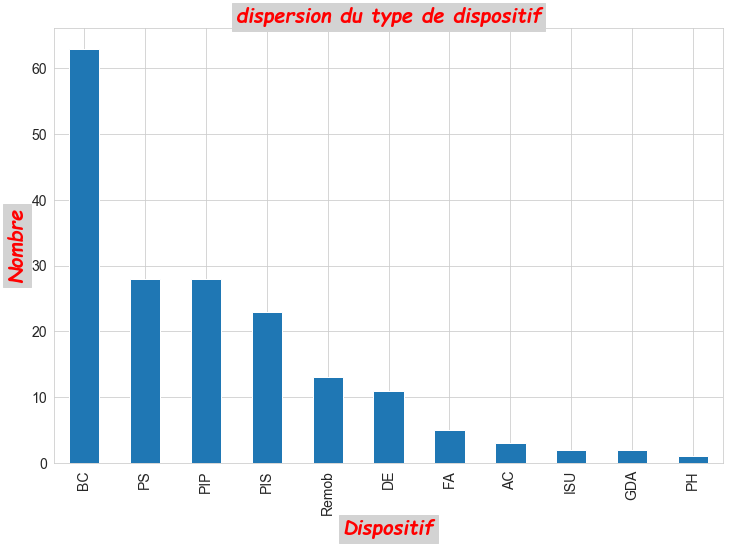

In [136]:
print(df.dispositif.value_counts(dropna=True))
fontdict = {"size":20, "color":"red", "alpha":1, "backgroundcolor":"lightgray", "style": "italic", "weight":"black", "family": "fantasy"}
dispTotal = df.dispositif.value_counts().plot(kind="bar", figsize=(12,8), fontsize =14)
dispTotal.set_xlabel("Dispositif", fontdict = fontdict)
dispTotal.set_ylabel("Nombre", fontdict= fontdict)
dispTotal.set_title(label = "dispersion du type de dispositif", fontdict= fontdict)

### Taux de pourcentage de du type de dispositif sont:

BC       0.35
PS       0.16
PIP      0.16
PIS      0.13
Remob    0.07
DE       0.06
FA       0.03
AC       0.02
ISU      0.01
GDA      0.01
PH       0.01
Name: dispositif, dtype: float64


Text(0.5, 1.0, 'Taux de pourcentage de dispositif')

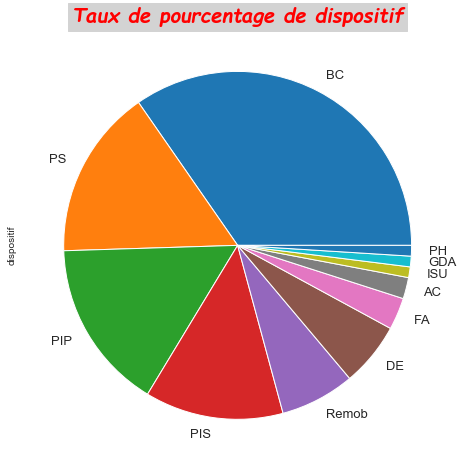

In [137]:
print(round((df.dispositif.value_counts(normalize=True)), 2))
dispTaux = round(df.dispositif.value_counts(normalize=True), 2).plot(kind="pie", figsize = (12,8), fontsize=13)
dispTaux.set_title("Taux de pourcentage de dispositif", fontdict=fontdict)

## Analyse de site

### Nom et Nombre total de site sont:

In [138]:
print("Nom de sites sont:", df.site.unique())
print("Nombre de site est: ", df.site.nunique())

Nom de sites sont: ['Avranches' 'Vire' 'Argentan' 'Saint-Lo' 'La Ferte-Mace' 'Flers'
 'Domfront' 'Autre Lieu Delocalise' 'Bayeux' 'Falaise' 'Caen']
Nombre de site est:  11


### Dispersion de site:

Vire                     52
Autre Lieu Delocalise    26
Argentan                 25
Avranches                14
Domfront                 13
La Ferte-Mace            12
Saint-Lo                 12
Bayeux                    9
Flers                     8
Falaise                   6
Caen                      2
Name: site, dtype: int64


Text(0.5, 1.0, 'Nombres total de site')

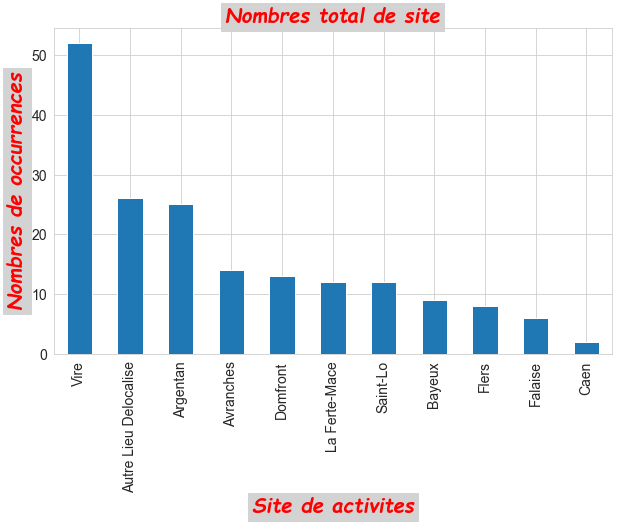

In [139]:
print(df.site.value_counts())
siteTotal = df.site.value_counts().plot(kind = "bar", title = "Nombre total de site", figsize=(10,6), fontsize=14)
siteTotal.set_xlabel("Site de activites", fontdict=fontdict)
siteTotal.set_ylabel("Nombres de occurrences", fontdict=fontdict)
siteTotal.set_title("Nombres total de site", fontdict=fontdict)

### Taux de pourcentage de site sont:

Vire                     0.29
Autre Lieu Delocalise    0.15
Argentan                 0.14
Avranches                0.08
Domfront                 0.07
La Ferte-Mace            0.07
Saint-Lo                 0.07
Bayeux                   0.05
Flers                    0.04
Falaise                  0.03
Caen                     0.01
Name: site, dtype: float64


Text(0.5, 1.0, 'Taux de pourcentage de site')

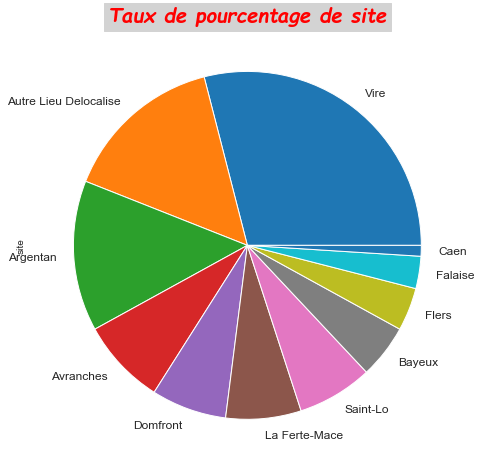

In [140]:
print(round((df.site.value_counts(normalize=True)), 2))
siteTaux = round(df.site.value_counts(normalize=True), 2).plot(kind="pie", figsize = (12,8), fontsize=12)
siteTaux.set_title("Taux de pourcentage de site", fontdict=fontdict)

## Analyse de debut

### Nombre de demandes d'enquête par année par rapport de debut de disposition

Nombre de demandes d'enquête par année : 
 2021    100
2020     78
2019      1
Name: annéeDebut, dtype: int64


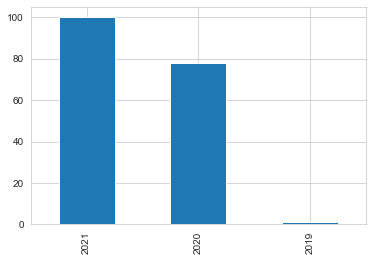

In [141]:
print("Nombre de demandes d'enquête par année :","\n", df.annéeDebut.value_counts())
df.annéeDebut.value_counts().plot(kind="bar")

### Nombre de demandes d'enquête par mois par rapport de debut de disposition

Text(0.5, 1.0, 'Les debuts de disposition par rapport de mois')

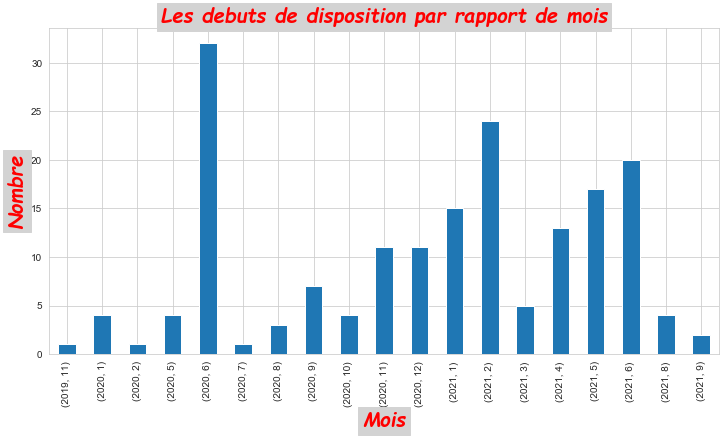

In [142]:
debutMois = df.groupby("annéeDebut")["moisDebut"].value_counts(ascending=False, sort=False).plot(kind="bar", figsize=(12,6))
debutMois.set_xlabel("Mois", fontdict=fontdict)
debutMois.set_ylabel("Nombre", fontdict=fontdict)
debutMois.set_title("Les debuts de disposition par rapport de mois", fontdict=fontdict)

### Periode des debuts

Répartition des périodes selon les dates de début est : périodeAnnuelleDebut
2019-2     1
2020-1    41
2020-2    37
2021-1    94
2021-2     6
Name: dispositif, dtype: int64


Text(0.5, 1.0, 'Répartition des périodes selon les dates de début')

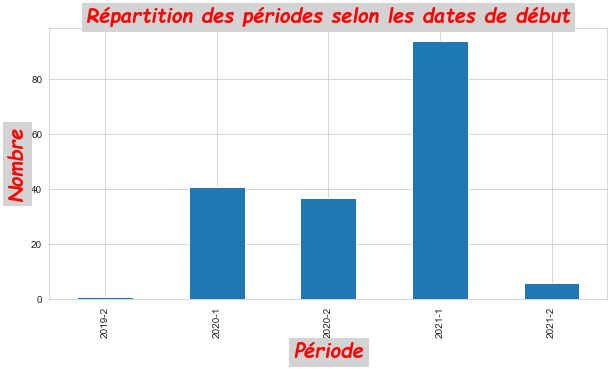

In [143]:
print("Répartition des périodes selon les dates de début est :", df.groupby("périodeAnnuelleDebut")["dispositif"].count())
périodeDebut = df.groupby("périodeAnnuelleDebut")["dispositif"].count().plot(kind="bar", figsize=(10,5))
périodeDebut.set_xlabel("Période", fontdict=fontdict)
périodeDebut.set_ylabel("Nombre", fontdict=fontdict)
périodeDebut.set_title("Répartition des périodes selon les dates de début", fontdict=fontdict)

## Analyse de fin

### Nombre de demandes d'enquête par année par rapport de fin de disposition

Nombre de demandes d'enquête par année : 
 2021    129
2020     50
Name: annéeFin, dtype: int64


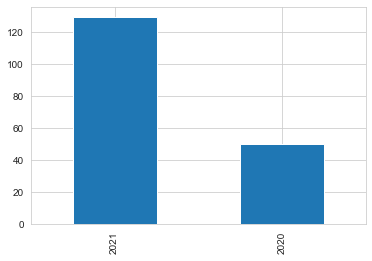

In [144]:
print("Nombre de demandes d'enquête par année :","\n", df.annéeFin.value_counts())
df.annéeFin.value_counts().plot(kind="bar")

### Nombre de demandes d'enquête par mois par rapport de fin de disposition

Text(0.5, 1.0, 'Les fins de disposition par rapport de mois')

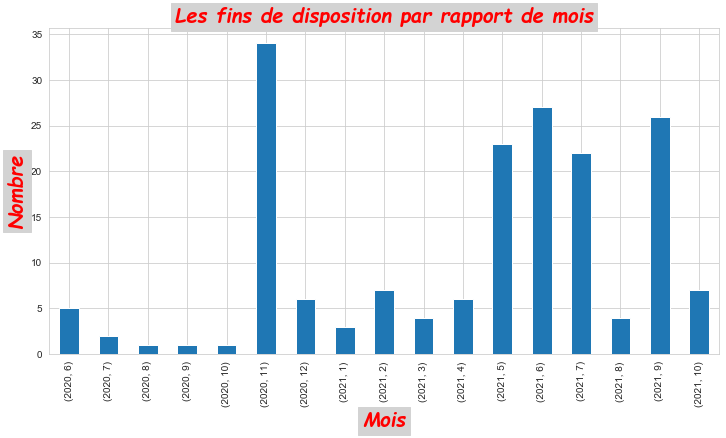

In [145]:
finMois = df.groupby("annéeFin")["moisFin"].value_counts(ascending=False, sort=False).plot(kind="bar", figsize=(12,6))
finMois.set_xlabel("Mois", fontdict=fontdict)
finMois.set_ylabel("Nombre", fontdict=fontdict)
finMois.set_title("Les fins de disposition par rapport de mois", fontdict=fontdict)

### Periode des fins

Répartition des périodes selon les dates de fin est : périodeAnnuelleFin
2020-1     5
2020-2    45
2021-1    70
2021-2    59
Name: dispositif, dtype: int64


Text(0.5, 1.0, 'Répartition des périodes selon les dates de début')

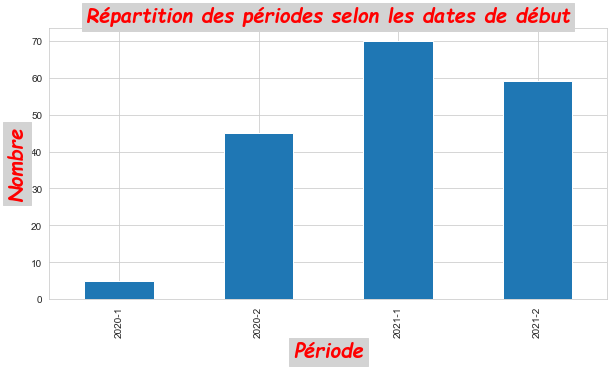

In [146]:
print("Répartition des périodes selon les dates de fin est :", df.groupby("périodeAnnuelleFin")["dispositif"].count())
périodeFin = df.groupby("périodeAnnuelleFin")["dispositif"].count().plot(kind="bar", figsize=(10,5))
périodeFin.set_xlabel("Période", fontdict=fontdict)
périodeFin.set_ylabel("Nombre", fontdict=fontdict)
périodeFin.set_title("Répartition des périodes selon les dates de début", fontdict=fontdict)

## Analyse de jour

Text(0.5, 1.0, 'Répartition des jours')

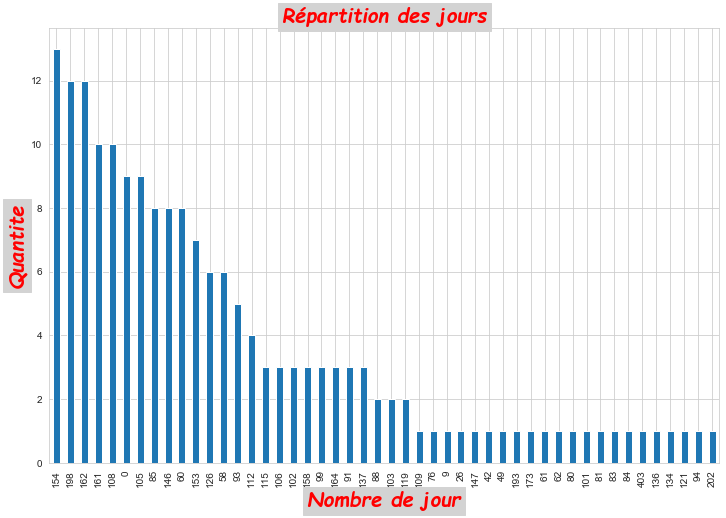

In [147]:
jour = df.jourChiffres.value_counts(ascending=False, sort=True).plot(kind="bar", figsize=(12,8))
jour.set_xlabel("Nombre de jour", fontdict=fontdict)
jour.set_ylabel("Quantite", fontdict=fontdict)
jour.set_title("Répartition des jours", fontdict=fontdict)

# Tableau général

In [148]:
#df.groupby("dispositif")["statue"].value_counts()

In [149]:
df.groupby(["dispositif", "site"])["statue"].value_counts()

dispositif  site                   statue       
AC          Autre Lieu Delocalise  intervenant-e     1
            La Ferte-Mace          beneficiaire      1
                                   intervenant-e     1
BC          Argentan               beneficiaire      1
                                   intervenant-e     1
                                   prescripteur      1
            Avranches              beneficiaire      1
            Flers                  beneficiaire      2
            Saint-Lo               beneficiaire      6
                                   intervenant-e     3
                                   prescripteur      3
            Vire                   intervenant-e    20
                                   beneficiaire     16
                                   prescripteur      9
DE          Autre Lieu Delocalise  beneficiaire      9
            Caen                   financeur         1
                                   prescripteur      1
FA          Autr

# Analysis de Questionnaire de Finaceur

In [150]:
dfFin = df[df.statue =="financeur"]

In [151]:
dfFin

,dispositif,site,debut,annéeDebut,moisDebut,jourDebut,périodeDebut,périodeAnnuelleDebut,fin,annéeFin,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
99,PIP,Argentan,2021-01-20,2021,1,20,1,2021-1,2021-06-15,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,La prestation correspond aux attentes du marché.,NaN,2021-06-25 08:58:23
108,PH,Autre Lieu Delocalise,2020-12-01,2020,12,1,2,2020-2,2020-12-01,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,renouvellement de cette action aupres des 6ème...,NaN,2021-06-30 10:32:36
127,PS,Bayeux,2021-05-17,2021,5,17,1,2021-1,2021-07-16,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accès à l'emploi pour 5p./10 soit 50% : 2 ACI...,Travailler sur la mixité des emplois. Elargir ...,2021-07-16 14:39:02
145,FA,Vire,2021-08-30,2021,8,30,2,2021-2,2021-08-30,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-30 14:03:26
149,Remob,Avranches,2021-02-16,2021,2,16,1,2021-1,2021-09-02,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Bon déroulement du bilan, à poursuivre. Bonne ...",Valoriser la progression durant l'action.,2021-09-07 09:43:37
161,DE,Caen,2021-06-14,2021,6,14,1,2021-1,2021-09-30,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"A refaire, la délocalisation a été très appréc...",moins de sophrologie et pourquoi pas le SST,2021-09-29 13:25:31


In [152]:
df.columns

Index(['dispositif', 'site', 'debut', 'annéeDebut', 'moisDebut', 'jourDebut',
       'périodeDebut', 'périodeAnnuelleDebut', 'fin', 'annéeFin', 'moisFin',
       'jourFin', 'périodeFin', 'périodeAnnuelleFin', 'jour', 'jourChiffres',
       'statue', 'branche', 'fin1', 'fin2', 'fin3', 'fin4', 'fin5', 'intType',
       'inter1', 'inter2', 'inter3', 'inter4', 'intForDis', 'inter5',
       'intRisqS', 'intRisqH', 'intRisqJ', 'intRisqEn', 'intRisqEc',
       'preUsager', 'pre1', 'pre2', 'pre3', 'pre4', 'pre5', 'pre6', 'ben1',
       'ben2', 'ben3', 'ben4', 'ben5', 'ben6', 'ben7', 'comment',
       'proposition', 'register_date'],
      dtype='object')

In [153]:
dfFin.drop(columns=['intType',
       'inter1', 'inter2', 'inter3', 'inter4', 'intForDis', 'inter5',
       'intRisqS', 'intRisqH', 'intRisqJ', 'intRisqEn', 'intRisqEc',
       'preUsager', 'pre1', 'pre2', 'pre3', 'pre4', 'pre5', 'pre6', 'ben1',
       'ben2', 'ben3', 'ben4', 'ben5', 'ben6', 'ben7'], axis = 1, inplace = True)

In [154]:
dfFin

,dispositif,site,debut,annéeDebut,moisDebut,jourDebut,périodeDebut,périodeAnnuelleDebut,fin,annéeFin,...,statue,branche,fin1,fin2,fin3,fin4,fin5,comment,proposition,register_date
99,PIP,Argentan,2021-01-20,2021,1,20,1,2021-1,2021-06-15,2021,...,financeur,financeur,Très satisfaisant,Très satisfaisant,Satisfaisant,Satisfaisant,Très satisfaisant,La prestation correspond aux attentes du marché.,NaN,2021-06-25 08:58:23
108,PH,Autre Lieu Delocalise,2020-12-01,2020,12,1,2,2020-2,2020-12-01,2020,...,financeur,financeur,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,renouvellement de cette action aupres des 6ème...,NaN,2021-06-30 10:32:36
127,PS,Bayeux,2021-05-17,2021,5,17,1,2021-1,2021-07-16,2021,...,financeur,financeur,Très satisfaisant,Très satisfaisant,Très satisfaisant,Satisfaisant,Très satisfaisant,Accès à l'emploi pour 5p./10 soit 50% : 2 ACI...,Travailler sur la mixité des emplois. Elargir ...,2021-07-16 14:39:02
145,FA,Vire,2021-08-30,2021,8,30,2,2021-2,2021-08-30,2021,...,financeur,financeur,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,NaN,NaN,2021-08-30 14:03:26
149,Remob,Avranches,2021-02-16,2021,2,16,1,2021-1,2021-09-02,2021,...,financeur,financeur,on,Satisfaisant,Satisfaisant,Très satisfaisant,Très satisfaisant,"Bon déroulement du bilan, à poursuivre. Bonne ...",Valoriser la progression durant l'action.,2021-09-07 09:43:37
161,DE,Caen,2021-06-14,2021,6,14,1,2021-1,2021-09-30,2021,...,financeur,financeur,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,"A refaire, la délocalisation a été très appréc...",moins de sophrologie et pourquoi pas le SST,2021-09-29 13:25:31


In [155]:
dfFin.rename(columns={"fin1":"Disponibilité", "fin2": "Administratif", "fin3": "Respect", "fin4":"Cohérence", "fin5": "Supports"}, inplace=True)

In [156]:
dfFin

,dispositif,site,debut,annéeDebut,moisDebut,jourDebut,périodeDebut,périodeAnnuelleDebut,fin,annéeFin,...,statue,branche,Disponibilité,Administratif,Respect,Cohérence,Supports,comment,proposition,register_date
99,PIP,Argentan,2021-01-20,2021,1,20,1,2021-1,2021-06-15,2021,...,financeur,financeur,Très satisfaisant,Très satisfaisant,Satisfaisant,Satisfaisant,Très satisfaisant,La prestation correspond aux attentes du marché.,NaN,2021-06-25 08:58:23
108,PH,Autre Lieu Delocalise,2020-12-01,2020,12,1,2,2020-2,2020-12-01,2020,...,financeur,financeur,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,renouvellement de cette action aupres des 6ème...,NaN,2021-06-30 10:32:36
127,PS,Bayeux,2021-05-17,2021,5,17,1,2021-1,2021-07-16,2021,...,financeur,financeur,Très satisfaisant,Très satisfaisant,Très satisfaisant,Satisfaisant,Très satisfaisant,Accès à l'emploi pour 5p./10 soit 50% : 2 ACI...,Travailler sur la mixité des emplois. Elargir ...,2021-07-16 14:39:02
145,FA,Vire,2021-08-30,2021,8,30,2,2021-2,2021-08-30,2021,...,financeur,financeur,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,NaN,NaN,2021-08-30 14:03:26
149,Remob,Avranches,2021-02-16,2021,2,16,1,2021-1,2021-09-02,2021,...,financeur,financeur,on,Satisfaisant,Satisfaisant,Très satisfaisant,Très satisfaisant,"Bon déroulement du bilan, à poursuivre. Bonne ...",Valoriser la progression durant l'action.,2021-09-07 09:43:37
161,DE,Caen,2021-06-14,2021,6,14,1,2021-1,2021-09-30,2021,...,financeur,financeur,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,"A refaire, la délocalisation a été très appréc...",moins de sophrologie et pourquoi pas le SST,2021-09-29 13:25:31


In [157]:
map_dict_fin = {"Très satisfaisant":5, "Satisfaisant":4, "Moyennement satisfaisant":3, "Pas satisfaisant":2, "Non concerné":1}

In [158]:
dfFin.Disponibilité = dfFin.Disponibilité.map(map_dict_fin)
dfFin.Administratif = dfFin.Administratif.map(map_dict_fin)
dfFin.Respect = dfFin.Respect.map(map_dict_fin)
dfFin.Cohérence = dfFin.Cohérence.map(map_dict_fin)
dfFin.Supports = dfFin.Supports.map(map_dict_fin)

In [159]:
dfFin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 99 to 161
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   dispositif            6 non-null      object         
 1   site                  6 non-null      object         
 2   debut                 6 non-null      datetime64[ns] 
 3   annéeDebut            6 non-null      int64          
 4   moisDebut             6 non-null      int64          
 5   jourDebut             6 non-null      int64          
 6   périodeDebut          6 non-null      int32          
 7   périodeAnnuelleDebut  6 non-null      object         
 8   fin                   6 non-null      datetime64[ns] 
 9   annéeFin              6 non-null      int64          
 10  moisFin               6 non-null      int64          
 11  jourFin               6 non-null      int64          
 12  périodeFin            6 non-null      int32          
 13  périod

#### Conversion les types des data au integer

In [161]:
dfFin["Disponibilité"] = dfFin.Disponibilité.astype("int64")

## Gérer les valeurs manquantes 

In [160]:
dfFin.Disponibilité.fillna(dfFin.Disponibilité.mean(), inplace =True)
dfFin.Administratif.fillna(dfFin.Administratif.mean(), inplace =True)
dfFin.Respect.fillna(dfFin.Administratif.mean(), inplace =True)
dfFin.Cohérence.fillna(dfFin.Administratif.mean(), inplace =True)
dfFin.Supports.fillna(dfFin.Administratif.mean(), inplace =True)

## Financeur tout les questions

In [169]:
dfFin.groupby(["dispositif", "site"])["Disponibilité","Administratif", "Respect", "Cohérence", "Supports"].agg(["count", "mean"])

Disponibilité      Administratif       \
                                         count mean         count mean   
dispositif site                                                          
DE         Caen                              1    5             1    5   
FA         Vire                              1    5             1    5   
PH         Autre Lieu Delocalise             1    5             1    5   
PIP        Argentan                          1    5             1    5   
PS         Bayeux                            1    5             1    5   
Remob      Avranches                         1    5             1    4   

                                 Respect      Cohérence      Supports       
                                   count mean     count mean    count mean  
dispositif site                                                             
DE         Caen                        1    5         1    5        1    5  
FA         Vire                        1    5         1    5        1    5  
PH         Autre Lieu Delocalise       1    5         1    5        1    5  
PIP        Argentan                    1    4         1    4        1    5  
PS         Bayeux                      1    5         1    4        1    5  
Remob      Avranches                   1    4         1    5        1    5

### Tableau general pour Financeur

Text(0.5, 1.0, "Moyennes globales de l'enquête auprès des financeurs")

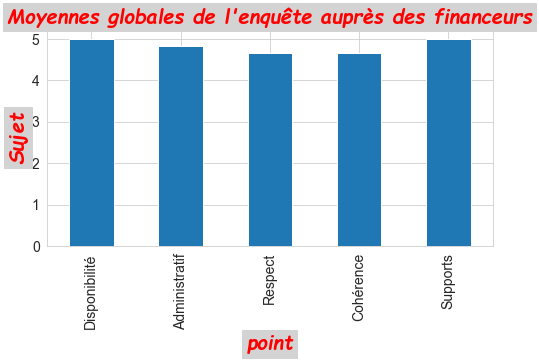

In [162]:
genFin= dfFin[["Disponibilité","Administratif", "Respect","Cohérence", "Supports"]].mean().plot(kind="bar", figsize=(8,4), fontsize=14)
genFin.set_xlabel("point", fontdict=fontdict)
genFin.set_ylabel("Sujet", fontdict=fontdict)
genFin.set_title("Moyennes globales de l'enquête auprès des financeurs", fontdict=fontdict)

### Les averages pour les questions

In [171]:
print("Avarage pour Disponibilité est: ", round(dfFin.Disponibilité.mean(), 1))
print("Avarage pour Administratif est: ", round(dfFin.Administratif.mean(), 1))
print("Avarage pour Respect est: ", round(dfFin.Respect.mean(),1))
print("Avarage pour Cohérence est: ", round(dfFin.Cohérence.mean(), 1))
print("Avarage pour Supports est: ", round(dfFin.Supports.mean(), 1))

Avarage pour Disponibilité est:  5.0
Avarage pour Administratif est:  4.8
Avarage pour Respect est:  4.7
Avarage pour Cohérence est:  4.7
Avarage pour Supports est:  5.0


In [163]:
dfFin[["Disponibilité","Administratif", "Respect","Cohérence", "Supports"]]

,Disponibilité,Administratif,Respect,Cohérence,Supports
99,5,5,4,4,5
108,5,5,5,5,5
127,5,5,5,4,5
145,5,5,5,5,5
149,5,4,4,5,5
161,5,5,5,5,5


### Les Avarages Pour Financeur

#### Question 1: Disponibilité et écoute de votre interlocuteur

Le nombre total de réponses sur Disponibilité est : 5    6
Name: Disponibilité, dtype: int64
Pourcentage pour Disponibilité est:  5    100.0
Name: Disponibilité, dtype: float64


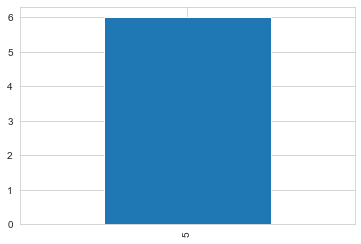

In [164]:
print("Le nombre total de réponses sur Disponibilité est :", dfFin["Disponibilité"].value_counts())
print("Pourcentage pour Disponibilité est: ", round(dfFin["Disponibilité"].value_counts(normalize=True)*100,1))
dfFin.Disponibilité.value_counts().plot(kind="bar")

#### Question 2: Suivi administratif de la prestation (convention, attestations, facturation…)

Le nombre total de réponses sur Administratif est : 5    5
4    1
Name: Administratif, dtype: int64
Avarage pour Administratif est:  5    83.3
4    16.7
Name: Administratif, dtype: float64


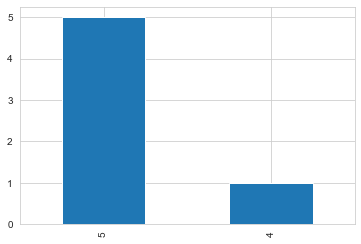

In [165]:
print("Le nombre total de réponses sur Administratif est :", dfFin["Administratif"].value_counts())
print("Avarage pour Administratif est: ", round(dfFin["Administratif"].value_counts(normalize=True)*100,1))
dfFin.Administratif.value_counts().plot(kind="bar")

#### Question 3: Respect des engagements pris

Le nombre total de réponses sur Respect est : 5    4
4    2
Name: Respect, dtype: int64
Avarage pour Respect est:  5    66.7
4    33.3
Name: Respect, dtype: float64


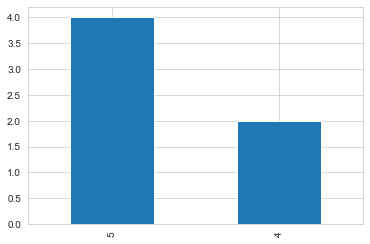

In [166]:
print("Le nombre total de réponses sur Respect est :", dfFin["Respect"].value_counts())
print("Avarage pour Respect est: ", round(dfFin["Respect"].value_counts(normalize=True)*100,1))
dfFin.Respect.value_counts().plot(kind="bar")

#### Question 4: Cohérence des objectifs et des contenus au regard de vos besoins

Le nombre total de réponses sur Cohérence est : 5    4
4    2
Name: Cohérence, dtype: int64
Avarage pour Cohérence est:  5    66.7
4    33.3
Name: Cohérence, dtype: float64


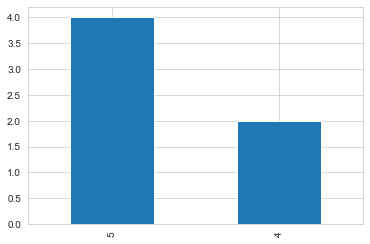

In [167]:
print("Le nombre total de réponses sur Cohérence est :", dfFin["Cohérence"].value_counts())
print("Avarage pour Cohérence est: ", round(dfFin["Cohérence"].value_counts(normalize=True)*100,1))
dfFin.Cohérence.value_counts().plot(kind="bar")

#### Question 5: Supports et moyens pédagogiques mis en œuvre au regard de vos attentes

Le nombre total de réponses sur Supports est : 5    6
Name: Supports, dtype: int64
Avarage pour Supports est:  5    100.0
Name: Supports, dtype: float64


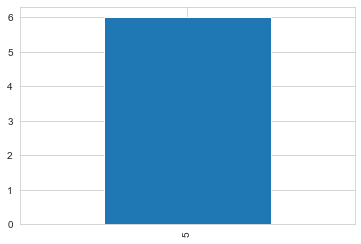

In [168]:
print("Le nombre total de réponses sur Supports est :", dfFin["Supports"].value_counts())
print("Avarage pour Supports est: ", round(dfFin["Supports"].value_counts(normalize=True)*100,1))
dfFin.Supports.value_counts().plot(kind="bar")

# Analysis de Questionnaire de Intervenant-e

In [321]:
df.statue.value_counts()

beneficiaire     110
intervenant-e     45
prescripteur      18
financeur          6
Name: statue, dtype: int64

In [322]:
dfInt = df[df.statue =="intervenant-e"]

In [323]:
dfInt.drop(columns=['fin1', 'fin2', 'fin3', 'fin4', 'fin5',
           'preUsager', 'pre1', 'pre2', 'pre3', 'pre4', 'pre5', 'pre6', 'ben1',
       'ben2', 'ben3', 'ben4', 'ben5', 'ben6', 'ben7'], axis=1, inplace=True)

In [324]:
dfInt.columns

Index(['dispositif', 'site', 'debut', 'annéeDebut', 'moisDebut', 'jourDebut',
       'périodeDebut', 'périodeAnnuelleDebut', 'fin', 'annéeFin', 'moisFin',
       'jourFin', 'périodeFin', 'périodeAnnuelleFin', 'jour', 'jourChiffres',
       'statue', 'branche', 'intType', 'inter1', 'inter2', 'inter3', 'inter4',
       'intForDis', 'inter5', 'intRisqS', 'intRisqH', 'intRisqJ', 'intRisqEn',
       'intRisqEc', 'comment', 'proposition', 'register_date'],
      dtype='object')

In [325]:
dfInt.head()

,dispositif,site,debut,annéeDebut,moisDebut,jourDebut,périodeDebut,périodeAnnuelleDebut,fin,annéeFin,...,intForDis,inter5,intRisqS,intRisqH,intRisqJ,intRisqEn,intRisqEc,comment,proposition,register_date
3,BC,Vire,2021-02-23,2021,2,23,1,2021-1,2021-06-08,2021,...,Oui,Très satisfaisant,Non,Non,Non,Non,Non,NaN,NaN,2021-06-22 12:21:35
6,BC,Vire,2021-01-08,2021,1,8,1,2021-1,2021-02-03,2021,...,Non,NaN,Non,Non,Non,Non,Non,NaN,NaN,2021-06-22 12:28:24
11,BC,Argentan,2021-02-03,2021,2,3,1,2021-1,2021-05-20,2021,...,Oui,Très satisfaisant,Non,Non,Non,Non,Non,NaN,NaN,2021-06-22 12:35:54
12,BC,Vire,2020-11-11,2020,11,11,2,2020-2,2021-05-03,2021,...,Non,NaN,Non,Non,Non,Non,Non,NaN,NaN,2021-06-22 12:37:03
13,BC,Vire,2021-02-02,2021,2,2,1,2021-1,2021-05-04,2021,...,Oui,Très satisfaisant,Non,Non,Non,Non,Non,NaN,NaN,2021-06-22 12:37:53


In [326]:
dfInt.rename(columns={'intType': "Type", "inter1":"Objectif", "inter2": "Contenus", "inter3": "Matériel", 
                      "inter4":"Document", "intForDis": "ForDistance", "inter5": "ForDistanceAvis", "intRisqS":"Risque_Social",
                      "intRisqH":"Risque_Hygiène" ,"intRisqJ":"Risque_Juridique","intRisqEn": "Risque_Environ","intRisqEc":"Risque_éco"}, inplace=True)

In [327]:
dfInt.head()

,dispositif,site,debut,annéeDebut,moisDebut,jourDebut,périodeDebut,périodeAnnuelleDebut,fin,annéeFin,...,ForDistance,ForDistanceAvis,Risque_Social,Risque_Hygiène,Risque_Juridique,Risque_Environ,Risque_éco,comment,proposition,register_date
3,BC,Vire,2021-02-23,2021,2,23,1,2021-1,2021-06-08,2021,...,Oui,Très satisfaisant,Non,Non,Non,Non,Non,NaN,NaN,2021-06-22 12:21:35
6,BC,Vire,2021-01-08,2021,1,8,1,2021-1,2021-02-03,2021,...,Non,NaN,Non,Non,Non,Non,Non,NaN,NaN,2021-06-22 12:28:24
11,BC,Argentan,2021-02-03,2021,2,3,1,2021-1,2021-05-20,2021,...,Oui,Très satisfaisant,Non,Non,Non,Non,Non,NaN,NaN,2021-06-22 12:35:54
12,BC,Vire,2020-11-11,2020,11,11,2,2020-2,2021-05-03,2021,...,Non,NaN,Non,Non,Non,Non,Non,NaN,NaN,2021-06-22 12:37:03
13,BC,Vire,2021-02-02,2021,2,2,1,2021-1,2021-05-04,2021,...,Oui,Très satisfaisant,Non,Non,Non,Non,Non,NaN,NaN,2021-06-22 12:37:53


In [328]:
dfInt.columns

Index(['dispositif', 'site', 'debut', 'annéeDebut', 'moisDebut', 'jourDebut',
       'périodeDebut', 'périodeAnnuelleDebut', 'fin', 'annéeFin', 'moisFin',
       'jourFin', 'périodeFin', 'périodeAnnuelleFin', 'jour', 'jourChiffres',
       'statue', 'branche', 'Type', 'Objectif', 'Contenus', 'Matériel',
       'Document', 'ForDistance', 'ForDistanceAvis', 'Risque_Social',
       'Risque_Hygiène', 'Risque_Juridique', 'Risque_Environ', 'Risque_éco',
       'comment', 'proposition', 'register_date'],
      dtype='object')

In [329]:
dfInt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 3 to 170
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   dispositif            45 non-null     object         
 1   site                  45 non-null     object         
 2   debut                 45 non-null     datetime64[ns] 
 3   annéeDebut            45 non-null     int64          
 4   moisDebut             45 non-null     int64          
 5   jourDebut             45 non-null     int64          
 6   périodeDebut          45 non-null     int32          
 7   périodeAnnuelleDebut  45 non-null     object         
 8   fin                   45 non-null     datetime64[ns] 
 9   annéeFin              45 non-null     int64          
 10  moisFin               45 non-null     int64          
 11  jourFin               45 non-null     int64          
 12  périodeFin            45 non-null     int32          
 13  périod

In [330]:
map_dict_int_Questions = {"Tout a fait":5, "Presque":4, "Pas vraiment":3, "Pas du tout":2}
map_dict_int_ForDistanceAvis = {"Très satisfaisant":5, "Satisfaisant":4, "Moyennement satisfaisant":3, "Insatisfaisant":2}
map_dict_int_OuiNon = {"Oui":1, "Non":0}

In [331]:
dfInt.Objectif= dfInt.Objectif.map(map_dict_int_Questions)
dfInt.Contenus= dfInt.Contenus.map(map_dict_int_Questions)
dfInt.Matériel= dfInt.Matériel.map(map_dict_int_Questions)
dfInt.Document= dfInt.Document.map(map_dict_int_Questions)
dfInt.ForDistanceAvis= dfInt.ForDistanceAvis.map(map_dict_int_ForDistanceAvis)
dfInt.ForDistance= dfInt.ForDistance.map(map_dict_int_OuiNon)
dfInt.Risque_Social= dfInt.Risque_Social.map(map_dict_int_OuiNon)
dfInt.Risque_Hygiène= dfInt.Risque_Hygiène.map(map_dict_int_OuiNon)
dfInt.Risque_Juridique= dfInt.Risque_Juridique.map(map_dict_int_OuiNon)
dfInt.Risque_Environ= dfInt.Risque_Environ.map(map_dict_int_OuiNon)
dfInt.Risque_éco= dfInt.Risque_éco.map(map_dict_int_OuiNon)

In [332]:
dfInt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 3 to 170
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   dispositif            45 non-null     object         
 1   site                  45 non-null     object         
 2   debut                 45 non-null     datetime64[ns] 
 3   annéeDebut            45 non-null     int64          
 4   moisDebut             45 non-null     int64          
 5   jourDebut             45 non-null     int64          
 6   périodeDebut          45 non-null     int32          
 7   périodeAnnuelleDebut  45 non-null     object         
 8   fin                   45 non-null     datetime64[ns] 
 9   annéeFin              45 non-null     int64          
 10  moisFin               45 non-null     int64          
 11  jourFin               45 non-null     int64          
 12  périodeFin            45 non-null     int32          
 13  périod

### Gérer les valeurs manquantes

In [333]:
dfInt.isnull().sum()

dispositif               0
site                     0
debut                    0
annéeDebut               0
moisDebut                0
jourDebut                0
périodeDebut             0
périodeAnnuelleDebut     0
fin                      0
annéeFin                 0
moisFin                  0
jourFin                  0
périodeFin               0
périodeAnnuelleFin       0
jour                     0
jourChiffres             0
statue                   0
branche                  0
Type                     1
Objectif                 0
Contenus                 2
Matériel                 1
Document                 3
ForDistance              1
ForDistanceAvis         31
Risque_Social            1
Risque_Hygiène          17
Risque_Juridique        18
Risque_Environ          17
Risque_éco              17
comment                 39
proposition             44
register_date            0
dtype: int64

In [334]:
dfInt.Objectif.fillna(dfInt.Objectif.mean(), inplace =True)
dfInt.Contenus.fillna(dfInt.Contenus.mean(), inplace =True)
dfInt.Matériel.fillna(dfInt.Matériel.mean(), inplace =True)
dfInt.Document.fillna(dfInt.Document.mean(), inplace =True)
dfInt.ForDistanceAvis.fillna(dfInt.ForDistanceAvis.mean(), inplace =True)
dfInt.ForDistance.fillna(dfInt.ForDistance.mean(), inplace =True)
dfInt.Risque_Social.fillna(dfInt.Risque_Social.mean(), inplace =True)
dfInt.Risque_Hygiène.fillna(dfInt.Risque_Hygiène.mean(), inplace =True)
dfInt.Risque_Juridique.fillna(dfInt.Risque_Juridique.mean(), inplace =True)
dfInt.Risque_Environ.fillna(dfInt.Risque_Environ.mean(), inplace =True)
dfInt.Risque_éco.fillna(dfInt.Risque_éco.mean(), inplace =True)

#### Conversion les types des data au integer

In [335]:
dfInt["Contenus"] = dfInt.Contenus.astype("int64")
dfInt["Matériel"] = dfInt.Matériel.astype("int64")
dfInt["Document"] = dfInt.Document.astype("int64")
dfInt["ForDistanceAvis"] = dfInt.ForDistanceAvis.astype("int64")
dfInt["ForDistance"] = dfInt.ForDistance.astype("int64")
dfInt["Risque_Social"] = dfInt.Risque_Social.astype("int64")
dfInt["Risque_Hygiène"] = dfInt.Risque_Hygiène.astype("int64")
dfInt["Risque_Juridique"] = dfInt.Risque_Juridique.astype("int64")
dfInt["Risque_Environ"] = dfInt.Risque_Environ.astype("int64")
dfInt["Risque_éco"] = dfInt.Risque_éco.astype("int64")

### Intervenant tout les questions

In [345]:
dfInt.groupby(["dispositif", "site"])["Contenus","Matériel", "Document", "ForDistanceAvis", "ForDistance","Risque_Social", "Risque_Hygiène", "Risque_Juridique","Risque_Environ", "Risque_éco"].agg(["count", "mean"]).round(1)

Contenus      Matériel      Document       \
                                    count mean    count mean    count mean   
dispositif site                                                              
AC         Autre Lieu Delocalise        1  5.0        1  5.0        1  5.0   
           La Ferte-Mace                1  5.0        1  5.0        1  5.0   
BC         Argentan                     1  5.0        1  5.0        1  5.0   
           Saint-Lo                     3  5.0        3  5.0        3  5.0   
           Vire                        20  5.0       20  5.0       20  5.0   
FA         Autre Lieu Delocalise        1  5.0        1  5.0        1  5.0   
           Vire                         1  4.0        1  5.0        1  5.0   
PIS        Argentan                     4  4.5        4  4.5        4  4.8   
           La Ferte-Mace                2  5.0        2  5.0        2  5.0   
PS         Autre Lieu Delocalise        1  5.0        1  5.0        1  5.0   
           Bayeux                       3  5.0        3  5.0        3  5.0   
Remob      Avranches                    7  4.9        7  5.0        7  4.7   

                                 ForDistanceAvis      ForDistance       \
                                           count mean       count mean   
dispositif site                                                          
AC         Autre Lieu Delocalise               1  4.0           1  0.0   
           La Ferte-Mace                       1  4.0           1  0.0   
BC         Argentan                            1  5.0           1  1.0   
           Saint-Lo                            3  4.3           3  0.7   
           Vire                               20  4.2          20  0.4   
FA         Autre Lieu Delocalise               1  4.0           1  0.0   
           Vire                                1  4.0           1  0.0   
PIS        Argentan                            4  4.2           4  0.2   
           La Ferte-Mace                       2  4.0           2  0.0   
PS         Autre Lieu Delocalise               1  4.0           1  0.0   
           Bayeux                              3  4.3           3  0.0   
Remob      Avranches                           7  4.0           7  0.0   

                                 Risque_Social      Risque_Hygiène       \
                                         count mean          count mean   
dispositif site                                                           
AC         Autre Lieu Delocalise             1    0              1    0   
           La Ferte-Mace                     1    0              1    0   
BC         Argentan                          1    0              1    0   
           Saint-Lo                          3    0              3    0   
           Vire                             20    0             20    0   
FA         Autre Lieu Delocalise             1    0              1    0   
           Vire                              1    0              1    0   
PIS        Argentan                          4    0              4    0   
           La Ferte-Mace                     2    0              2    0   
PS         Autre Lieu Delocalise             1    0              1    0   
           Bayeux                            3    0              3    0   
Remob      Avranches                         7    0              7    0   

                                 Risque_Juridique      Risque_Environ       \
                                            count mean          count mean   
dispositif site                                                              
AC         Autre Lieu Delocalise                1    0              1    0   
           La Ferte-Mace                        1    0              1    0   
BC         Argentan                             1    0              1    0   
           Saint-Lo                             3    0              3    0   
           Vire                                20    0             20    0   
F

### Tableau general pour Intervenant

Text(0.5, 1.0, "Moyennes globales de l'enquête auprès des intervenants")

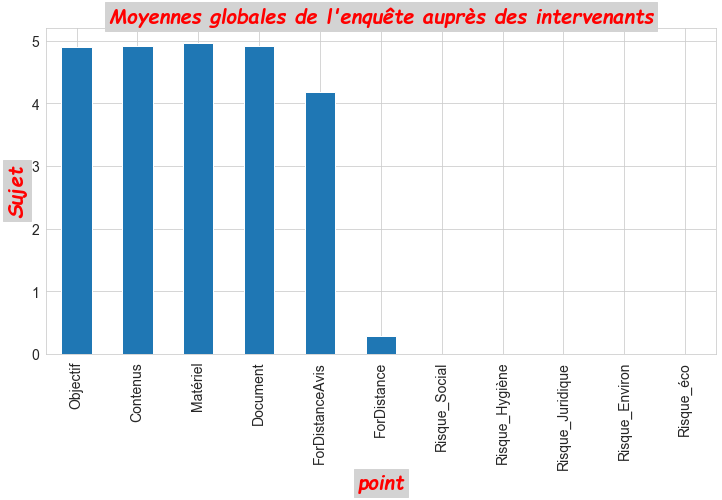

In [337]:
genInt= dfInt[["Objectif","Contenus", "Matériel","Document","ForDistanceAvis", "ForDistance", "Risque_Social", "Risque_Hygiène", "Risque_Juridique", "Risque_Environ","Risque_éco" ]].mean().plot(kind="bar", 
                figsize=(12,6), fontsize=14)
genInt.set_xlabel("point", fontdict=fontdict)
genInt.set_ylabel("Sujet", fontdict=fontdict)
genInt.set_title("Moyennes globales de l'enquête auprès des intervenants", fontdict=fontdict)

### Les averages pour les questions

In [338]:
print("Avarage pour Objectif est: ", round(dfInt.Objectif.mean(), 1))
print("Avarage pour Contenus est: ", round(dfInt.Contenus.mean(), 1))
print("Avarage pour Matériel est: ", round(dfInt.Matériel.mean(),1))
print("Avarage pour Document est: ", round(dfInt.Document.mean(), 1))
print("Avarage pour ForDistanceAvis est: ", round(dfInt.ForDistanceAvis.mean(), 1))
print("Avarage pour ForDistance est: ", round(dfInt.ForDistance.mean(), 1))
print("Avarage pour Risque_Social est: ", round(dfInt.Risque_Social.mean(), 1))
print("Avarage pour Risque_Hygiène est: ", round(dfInt.Risque_Hygiène.mean(), 1))
print("Avarage pour Risque_Juridique est: ", round(dfInt.Risque_Juridique.mean(), 1))
print("Avarage pour Risque_Environ est: ", round(dfInt.Risque_Environ.mean(), 1))
print("Avarage pour Risque_éco est: ", round(dfInt.Risque_éco.mean(), 1))

Avarage pour Objectif est:  4.9
Avarage pour Contenus est:  4.9
Avarage pour Matériel est:  5.0
Avarage pour Document est:  4.9
Avarage pour ForDistanceAvis est:  4.2
Avarage pour ForDistance est:  0.3
Avarage pour Risque_Social est:  0.0
Avarage pour Risque_Hygiène est:  0.0
Avarage pour Risque_Juridique est:  0.0
Avarage pour Risque_Environ est:  0.0
Avarage pour Risque_éco est:  0.0


In [339]:
dfInt[["Objectif","Contenus", "Matériel","Document","ForDistanceAvis", "ForDistance", "Risque_Social", "Risque_Hygiène", "Risque_Juridique", "Risque_Environ","Risque_éco"]].head()

,Objectif,Contenus,Matériel,Document,ForDistanceAvis,ForDistance,Risque_Social,Risque_Hygiène,Risque_Juridique,Risque_Environ,Risque_éco
3,5,5,5,5,5,1,0,0,0,0,0
6,5,5,5,5,4,0,0,0,0,0,0
11,5,5,5,5,5,1,0,0,0,0,0
12,5,5,5,5,4,0,0,0,0,0,0
13,5,5,5,5,5,1,0,0,0,0,0


### Les Avarages Pour Intervenant

#### `Question 1`: Les objectifs de la formation ont-ils été atteints ?

Le nombre total de réponses sur Objectif est : 5    40
4     5
Name: Objectif, dtype: int64
Pourcentage pour Objectif est:  5    88.9
4    11.1
Name: Objectif, dtype: float64


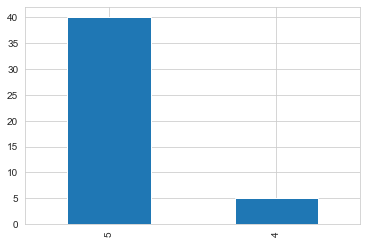

In [340]:
print("Le nombre total de réponses sur Objectif est :", dfInt["Objectif"].value_counts())
print("Pourcentage pour Objectif est: ", round(dfInt["Objectif"].value_counts(normalize=True)*100,1))
dfInt.Objectif.value_counts().plot(kind="bar")

#### `Question 2`: L’équipe a pu aborder l’ensemble des contenus du programme ?

Le nombre total de réponses sur Contenus est : 5    41
4     4
Name: Contenus, dtype: int64
Pourcentage pour Contenus est:  5    91.1
4     8.9
Name: Contenus, dtype: float64


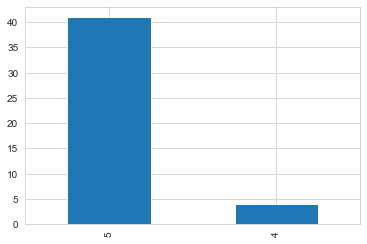

In [341]:
print("Le nombre total de réponses sur Contenus est :", dfInt["Contenus"].value_counts())
print("Pourcentage pour Contenus est: ", round(dfInt["Contenus"].value_counts(normalize=True)*100,1))
dfInt.Contenus.value_counts().plot(kind="bar")

#### `Question 3`: L’équipe a disposé des moyens matériels suffisants pour conduire la prestation ?

Le nombre total de réponses sur Matériel est : 5    43
4     2
Name: Matériel, dtype: int64
Pourcentage pour Matériel est:  5    95.6
4     4.4
Name: Matériel, dtype: float64


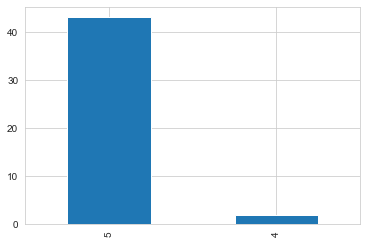

In [291]:
print("Le nombre total de réponses sur Matériel est :", dfInt["Matériel"].value_counts())
print("Pourcentage pour Matériel est: ", round(dfInt["Matériel"].value_counts(normalize=True)*100,1))
dfInt.Matériel.value_counts().plot(kind="bar")

#### `Question 4`: L’équipe a eu accès à tous les documents administratifs et pédagogiques pour mener l’action ?

Le nombre total de réponses sur Document est : 5    41
4     4
Name: Document, dtype: int64
Pourcentage pour Document est:  5    91.1
4     8.9
Name: Document, dtype: float64


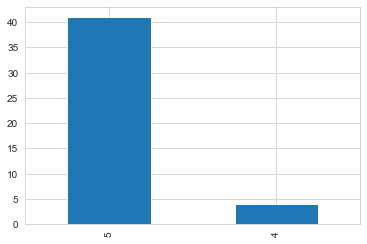

In [292]:
print("Le nombre total de réponses sur Document est :", dfInt["Document"].value_counts())
print("Pourcentage pour Document est: ", round(dfInt["Document"].value_counts(normalize=True)*100,1))
dfInt.Document.value_counts().plot(kind="bar")

#### `Question 5`: Avez-vous réalisé tout ou une partie de la formation en distanciel ?

Le nombre total de réponses sur ForDistance est : 0    32
1    13
Name: ForDistance, dtype: int64
Pourcentage pour ForDistance est:  0    71.1
1    28.9
Name: ForDistance, dtype: float64


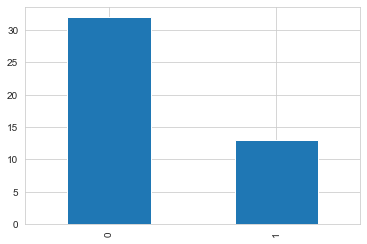

In [293]:
print("Le nombre total de réponses sur ForDistance est :", dfInt["ForDistance"].value_counts())
print("Pourcentage pour ForDistance est: ", round(dfInt["ForDistance"].value_counts(normalize=True)*100,1))
dfInt.ForDistance.value_counts().plot(kind="bar")

#### `Question 6`: (Si le question 5 oui) Votre avis sur la réalisation de tout ou une partie de la prestation en distanciel ?

Le nombre total de réponses sur ForDistanceAvis est : 4    37
5     8
Name: ForDistanceAvis, dtype: int64
Pourcentage pour ForDistanceAvis est:  4    82.2
5    17.8
Name: ForDistanceAvis, dtype: float64


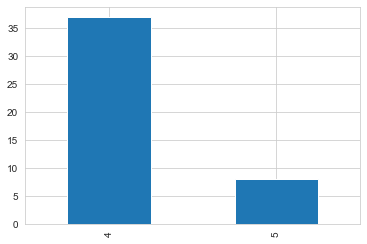

In [294]:
print("Le nombre total de réponses sur ForDistanceAvis est :", dfInt["ForDistanceAvis"].value_counts())
print("Pourcentage pour ForDistanceAvis est: ", round(dfInt["ForDistanceAvis"].value_counts(normalize=True)*100,1))
dfInt.ForDistanceAvis.value_counts().plot(kind="bar")

#### `Question 7`: Risques sociaux (incivilité, discrimination, agression, violence…) ?

Le nombre total de réponses sur Risque_Social est : 0    45
Name: Risque_Social, dtype: int64
Pourcentage pour Risque_Social est:  0    100.0
Name: Risque_Social, dtype: float64


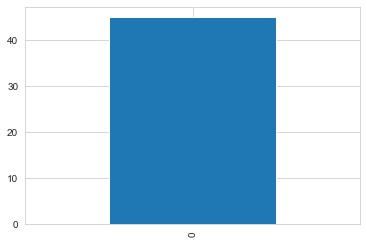

In [295]:
print("Le nombre total de réponses sur Risque_Social est :", dfInt["Risque_Social"].value_counts())
print("Pourcentage pour Risque_Social est: ", round(dfInt["Risque_Social"].value_counts(normalize=True)*100,1))
dfInt.Risque_Social.value_counts().plot(kind="bar")

#### `Question 8`: Risques hygiènes et sécurité des locaux (issue de secours, propreté des locaux…) ?

Le nombre total de réponses sur Risque_Hygiène est : 0    45
Name: Risque_Hygiène, dtype: int64
Pourcentage pour Risque_Hygiène est:  0    100.0
Name: Risque_Hygiène, dtype: float64


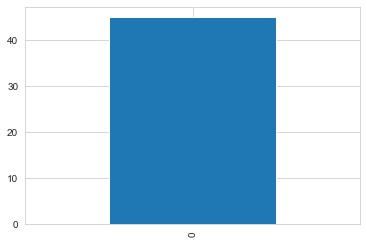

In [296]:
print("Le nombre total de réponses sur Risque_Hygiène est :", dfInt["Risque_Hygiène"].value_counts())
print("Pourcentage pour Risque_Hygiène est: ", round(dfInt["Risque_Hygiène"].value_counts(normalize=True)*100,1))
dfInt.Risque_Hygiène.value_counts().plot(kind="bar")

#### `Question 9`: Risques juridiques (non-respect des éléments contractuels, condition de la période d’immersion en entreprise…) ?

Le nombre total de réponses sur Risque_Juridique est : 0    45
Name: Risque_Juridique, dtype: int64
Pourcentage pour Risque_Juridique est:  0    100.0
Name: Risque_Juridique, dtype: float64


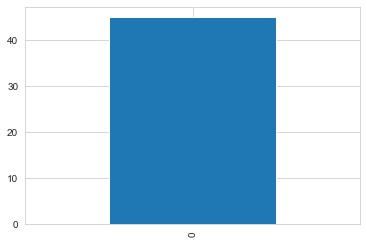

In [297]:
print("Le nombre total de réponses sur Risque_Juridique est :", dfInt["Risque_Juridique"].value_counts())
print("Pourcentage pour Risque_Juridique est: ", round(dfInt["Risque_Juridique"].value_counts(normalize=True)*100,1))
dfInt.Risque_Juridique.value_counts().plot(kind="bar")

#### `Question 10`: Risques environnementaux (absence ou mauvaise gestion des déchets…) ?

Le nombre total de réponses sur Risque_Environ est : 0    45
Name: Risque_Environ, dtype: int64
Pourcentage pour Risque_Environ est:  0    100.0
Name: Risque_Environ, dtype: float64


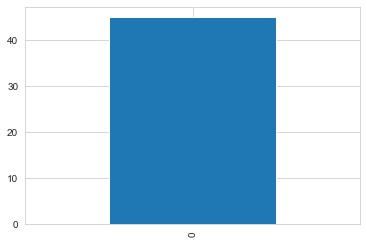

In [298]:
print("Le nombre total de réponses sur Risque_Environ est :", dfInt["Risque_Environ"].value_counts())
print("Pourcentage pour Risque_Environ est: ", round(dfInt["Risque_Environ"].value_counts(normalize=True)*100,1))
dfInt.Risque_Environ.value_counts().plot(kind="bar")

#### `Question 11`: Risques économiques (effectif trop faible, absentéisme…) ?

Le nombre total de réponses sur Risque_éco est : 0    45
Name: Risque_éco, dtype: int64
Pourcentage pour Risque_éco est:  0    100.0
Name: Risque_éco, dtype: float64


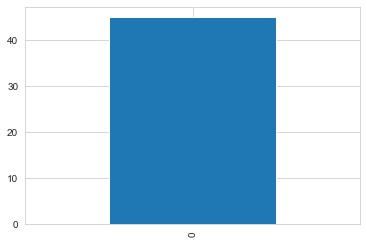

In [299]:
print("Le nombre total de réponses sur Risque_éco est :", dfInt["Risque_éco"].value_counts())
print("Pourcentage pour Risque_éco est: ", round(dfInt["Risque_éco"].value_counts(normalize=True)*100,1))
dfInt.Risque_éco.value_counts().plot(kind="bar")

In [95]:
import pickle

In [352]:
df.to_pickle("etapData.pkl")

In [353]:
output = pd.read_pickle("etapData.pkl")